# Package and Data Import

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

from sklearn import metrics

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

In [96]:
## read in data
df = pd.read_excel("project_data.xlsx")

In [97]:
## to visulaise all columns in output
pd.set_option('display.max_columns', 31)

In [98]:
## visualise data
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


# EDA

In [99]:
## check dimesions
df.shape

(7043, 31)

In [100]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Reason'],
      dtype='object')

In [101]:
## transform column names for workability 
new_columns = lambda col: col.strip().lower().replace(" ", "_")
df.rename(columns=new_columns, inplace=True)

In [102]:
df.columns

Index(['customerid', 'count', 'country', 'state', 'city', 'zip_code',
       'lat_long', 'latitude', 'longitude', 'gender', 'senior_citizen',
       'partner', 'dependents', 'tenure_months', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'churn_label', 'churn_value',
       'churn_reason'],
      dtype='object')

In [103]:
## check unique values in columns
df.nunique()

customerid           7043
count                   1
country                 1
state                   1
city                 1129
zip_code             1652
lat_long             1652
latitude             1652
longitude            1651
gender                  2
senior_citizen          2
partner                 2
dependents              2
tenure_months          73
phone_service           2
multiple_lines          3
internet_service        3
online_security         3
online_backup           3
device_protection       3
tech_support            3
streaming_tv            3
streaming_movies        3
contract                3
paperless_billing       2
payment_method          4
monthly_charges      1585
total_charges        6531
churn_label             2
churn_value             2
churn_reason           20
dtype: int64

In [104]:
## check data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerid         7043 non-null   object 
 1   count              7043 non-null   int64  
 2   country            7043 non-null   object 
 3   state              7043 non-null   object 
 4   city               7043 non-null   object 
 5   zip_code           7043 non-null   int64  
 6   lat_long           7043 non-null   object 
 7   latitude           7043 non-null   float64
 8   longitude          7043 non-null   float64
 9   gender             7043 non-null   object 
 10  senior_citizen     7043 non-null   object 
 11  partner            7043 non-null   object 
 12  dependents         7043 non-null   object 
 13  tenure_months      7043 non-null   int64  
 14  phone_service      7043 non-null   object 
 15  multiple_lines     7043 non-null   object 
 16  internet_service   7043 

In [105]:
## check null values
df.isnull().sum()

customerid              0
count                   0
country                 0
state                   0
city                    0
zip_code                0
lat_long                0
latitude                0
longitude               0
gender                  0
senior_citizen          0
partner                 0
dependents              0
tenure_months           0
phone_service           0
multiple_lines          0
internet_service        0
online_security         0
online_backup           0
device_protection       0
tech_support            0
streaming_tv            0
streaming_movies        0
contract                0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
churn_label             0
churn_value             0
churn_reason         5174
dtype: int64

In [106]:
## check if all the 'churn reason' nulls are for customers that haven't churned
df.churn_value.eq(0).sum()

5174

### Data cleaning and prep

In [107]:
## count positives vs negatives
df['churn_value'].value_counts()

0    5174
1    1869
Name: churn_value, dtype: int64

In [108]:
df['churn_value'].value_counts(normalize=True)*100

0    73.463013
1    26.536987
Name: churn_value, dtype: float64

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerid         7043 non-null   object 
 1   count              7043 non-null   int64  
 2   country            7043 non-null   object 
 3   state              7043 non-null   object 
 4   city               7043 non-null   object 
 5   zip_code           7043 non-null   int64  
 6   lat_long           7043 non-null   object 
 7   latitude           7043 non-null   float64
 8   longitude          7043 non-null   float64
 9   gender             7043 non-null   object 
 10  senior_citizen     7043 non-null   object 
 11  partner            7043 non-null   object 
 12  dependents         7043 non-null   object 
 13  tenure_months      7043 non-null   int64  
 14  phone_service      7043 non-null   object 
 15  multiple_lines     7043 non-null   object 
 16  internet_service   7043 

In [110]:
df.loc[:, df.nunique() == 3]

,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract
0,No,DSL,Yes,Yes,No,No,No,No,Month-to-month
1,No,Fiber optic,No,No,No,No,No,No,Month-to-month
2,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month
3,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month
4,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month
...,...,...,...,...,...,...,...,...,...
7038,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year
7039,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year
7040,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year
7041,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month


In [111]:
df.internet_service.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: internet_service, dtype: int64

In [112]:
df.phone_service.value_counts()

Yes    6361
No      682
Name: phone_service, dtype: int64

In [113]:
df[df.eq('No internet service').any(axis=1)]

,customerid,count,country,state,city,zip_code,lat_long,latitude,longitude,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_reason
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,Competitor made better offer
22,0278-YXOOG,1,United States,California,Inglewood,90301,"33.956445, -118.358634",33.956445,-118.358634,Male,No,No,No,5,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,Yes,1,Network reliability
65,6323-AYBRX,1,United States,California,Ontario,91762,"34.057256, -117.667677",34.057256,-117.667677,Male,No,No,No,59,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes,1,Price too high
99,4895-TMWIR,1,United States,California,Indian Wells,92210,"33.537646, -116.291089",33.537646,-116.291089,Male,Yes,Yes,No,11,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.95,214.75,Yes,1,Limited range of services
103,4800-VHZKI,1,United States,California,Niland,92257,"33.345825, -115.596574",33.345825,-115.596574,Female,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.90,19.9,Yes,1,Price too high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,4807-IZYOZ,1,United States,California,North Palm Springs,92258,"33.906496, -116.569499",33.906496,-116.569499,Female,No,No,No,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,No,0,NaN
7024,9710-NJERN,1,United States,California,Palm Desert,92260,"33.694501, -116.412711",33.694501,-116.412711,Female,No,No,No,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826,No,0,NaN
7025,9837-FWLCH,1,United States,California,Palm Springs,92262,"33.839989, -116.659215",33.839989,-116.659215,Male,No,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239,No,0,NaN
7033,0871-OPBXW,1,United States,California,Twentynine Palms,92277,"34.17211, -115.769773",34.172110,-115.769773,Female,No,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No,0,NaN


In [ ]:
df[(df['multiple_lines'] == 'No') & (df['phone_service'] == 'Yes')].groupby('internet_service').count()

In [114]:
df.drop(df[df.internet_service == 'No'].index, inplace=True)

In [115]:
df.internet_service.value_counts()

Fiber optic    3096
DSL            2421
Name: internet_service, dtype: int64

In [116]:
df.shape

(5517, 31)

In [117]:
df.nunique()

customerid           5517
count                   1
country                 1
state                   1
city                 1127
zip_code             1649
lat_long             1649
latitude             1649
longitude            1648
gender                  2
senior_citizen          2
partner                 2
dependents              2
tenure_months          73
phone_service           2
multiple_lines          3
internet_service        2
online_security         2
online_backup           2
device_protection       2
tech_support            2
streaming_tv            2
streaming_movies        2
contract                3
paperless_billing       2
payment_method          4
monthly_charges      1494
total_charges        5259
churn_label             2
churn_value             2
churn_reason           20
dtype: int64

In [118]:
df.churn_value.value_counts()

0    3761
1    1756
Name: churn_value, dtype: int64

In [119]:
df['churn_value'].value_counts(normalize=True)*100

0    68.171107
1    31.828893
Name: churn_value, dtype: float64

In [120]:
df.multiple_lines.value_counts()

Yes                 2629
No                  2206
No phone service     682
Name: multiple_lines, dtype: int64

In [122]:
temp_df = df[df.multiple_lines == 'No phone service']

In [123]:
temp_df.internet_service.value_counts()

DSL    682
Name: internet_service, dtype: int64

In [124]:
df.drop(df[df.multiple_lines == 'No phone service'].index, inplace=True)

In [125]:
df.multiple_lines.value_counts()

Yes    2629
No     2206
Name: multiple_lines, dtype: int64

In [126]:
categorical_columns = []
for column in df:
    unique_values = df[column].unique()
    if len(unique_values) == 2 and 'Yes' in unique_values and 'No' in unique_values:
        categorical_columns.append(column)

C:\Users\mms\AppData\Local\Temp\ipykernel_14088\2286360966.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if len(unique_values) == 2 and 'Yes' in unique_values and 'No' in unique_values:


In [127]:
categorical_columns

['senior_citizen',
 'partner',
 'dependents',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn_label']

In [128]:
df.nunique()

customerid           4835
count                   1
country                 1
state                   1
city                 1112
zip_code             1632
lat_long             1632
latitude             1632
longitude            1631
gender                  2
senior_citizen          2
partner                 2
dependents              2
tenure_months          73
phone_service           1
multiple_lines          2
internet_service        2
online_security         2
online_backup           2
device_protection       2
tech_support            2
streaming_tv            2
streaming_movies        2
contract                3
paperless_billing       2
payment_method          4
monthly_charges      1278
total_charges        4628
churn_label             2
churn_value             2
churn_reason           20
dtype: int64

In [129]:
## need to one hot encode
df.contract.unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

In [130]:
df = pd.get_dummies(df, columns=['contract'], drop_first=True)

In [131]:
df.columns

Index(['customerid', 'count', 'country', 'state', 'city', 'zip_code',
       'lat_long', 'latitude', 'longitude', 'gender', 'senior_citizen',
       'partner', 'dependents', 'tenure_months', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'churn_label', 'churn_value',
       'churn_reason', 'contract_One year', 'contract_Two year'],
      dtype='object')

In [132]:
categorical_columns

['senior_citizen',
 'partner',
 'dependents',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn_label']

In [133]:
df.phone_service.value_counts()

Yes    4835
Name: phone_service, dtype: int64

In [134]:
df.internet_service.value_counts()

Fiber optic    3096
DSL            1739
Name: internet_service, dtype: int64

In [135]:
df.columns

Index(['customerid', 'count', 'country', 'state', 'city', 'zip_code',
       'lat_long', 'latitude', 'longitude', 'gender', 'senior_citizen',
       'partner', 'dependents', 'tenure_months', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'churn_label', 'churn_value',
       'churn_reason', 'contract_One year', 'contract_Two year'],
      dtype='object')

In [136]:
drop_cols = ['customerid', 'count', 'country', 'state', 'city', 'zip_code',
'lat_long', 'latitude', 'longitude', 'phone_service', 'payment_method','churn_label','churn_reason']

df.drop(columns=drop_cols, inplace=True)

In [137]:
df.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure_months',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn_value', 'contract_One year',
       'contract_Two year'],
      dtype='object')

In [138]:
df.head()

,gender,senior_citizen,partner,dependents,tenure_months,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn_value,contract_One year,contract_Two year
0,Male,No,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,53.85,108.15,1,0,0
1,Female,No,No,Yes,2,No,Fiber optic,No,No,No,No,No,No,Yes,70.70,151.65,1,0,0
2,Female,No,No,Yes,8,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Yes,99.65,820.5,1,0,0
3,Female,No,Yes,Yes,28,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes,104.80,3046.05,1,0,0
4,Male,No,No,Yes,49,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,103.70,5036.3,1,0,0


In [139]:
df.churn_value.value_counts()

0    3249
1    1586
Name: churn_value, dtype: int64

In [140]:
df['churn_value'].value_counts(normalize=True)*100

0    67.197518
1    32.802482
Name: churn_value, dtype: float64

In [149]:
df.replace({'No': 0, 'Yes': 1}, inplace=True)
df.gender.replace({'Male': 0, 'Female': 1}, inplace=True)
df.internet_service.replace({'DSL': 0, 'Fiber optic': 1}, inplace=True)

In [150]:
df.head()

,gender,senior_citizen,partner,dependents,tenure_months,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn_value,contract_One year,contract_Two year
0,0,0,0,0,2,0,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0
1,1,0,0,1,2,0,1,0,0,0,0,0,0,1,70.70,151.65,1,0,0
2,1,0,0,1,8,1,1,0,0,1,0,1,1,1,99.65,820.5,1,0,0
3,1,0,1,1,28,1,1,0,0,1,1,1,1,1,104.80,3046.05,1,0,0
4,0,0,0,1,49,1,1,0,1,1,0,1,1,1,103.70,5036.3,1,0,0


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4835 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4835 non-null   int64  
 1   senior_citizen     4835 non-null   int64  
 2   partner            4835 non-null   int64  
 3   dependents         4835 non-null   int64  
 4   tenure_months      4835 non-null   int64  
 5   multiple_lines     4835 non-null   int64  
 6   internet_service   4835 non-null   int64  
 7   online_security    4835 non-null   int64  
 8   online_backup      4835 non-null   int64  
 9   device_protection  4835 non-null   int64  
 10  tech_support       4835 non-null   int64  
 11  streaming_tv       4835 non-null   int64  
 12  streaming_movies   4835 non-null   int64  
 13  paperless_billing  4835 non-null   int64  
 14  monthly_charges    4835 non-null   float64
 15  total_charges      4835 non-null   object 
 16  churn_value        4835 

In [153]:
df['total_charges'] = df['total_charges'].astype(float)

ValueError: could not convert string to float: ' '

In [157]:
df.total_charges.value_counts()[' ']

3

In [159]:
df.total_charges.replace(' ', 0, inplace=True)

In [162]:
df.total_charges.value_counts()[0]

3

In [165]:
df['total_charges'] = df['total_charges'].astype(float)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4835 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4835 non-null   int64  
 1   senior_citizen     4835 non-null   int64  
 2   partner            4835 non-null   int64  
 3   dependents         4835 non-null   int64  
 4   tenure_months      4835 non-null   int64  
 5   multiple_lines     4835 non-null   int64  
 6   internet_service   4835 non-null   int64  
 7   online_security    4835 non-null   int64  
 8   online_backup      4835 non-null   int64  
 9   device_protection  4835 non-null   int64  
 10  tech_support       4835 non-null   int64  
 11  streaming_tv       4835 non-null   int64  
 12  streaming_movies   4835 non-null   int64  
 13  paperless_billing  4835 non-null   int64  
 14  monthly_charges    4835 non-null   float64
 15  total_charges      4835 non-null   float64
 16  churn_value        4835 

<Axes: >

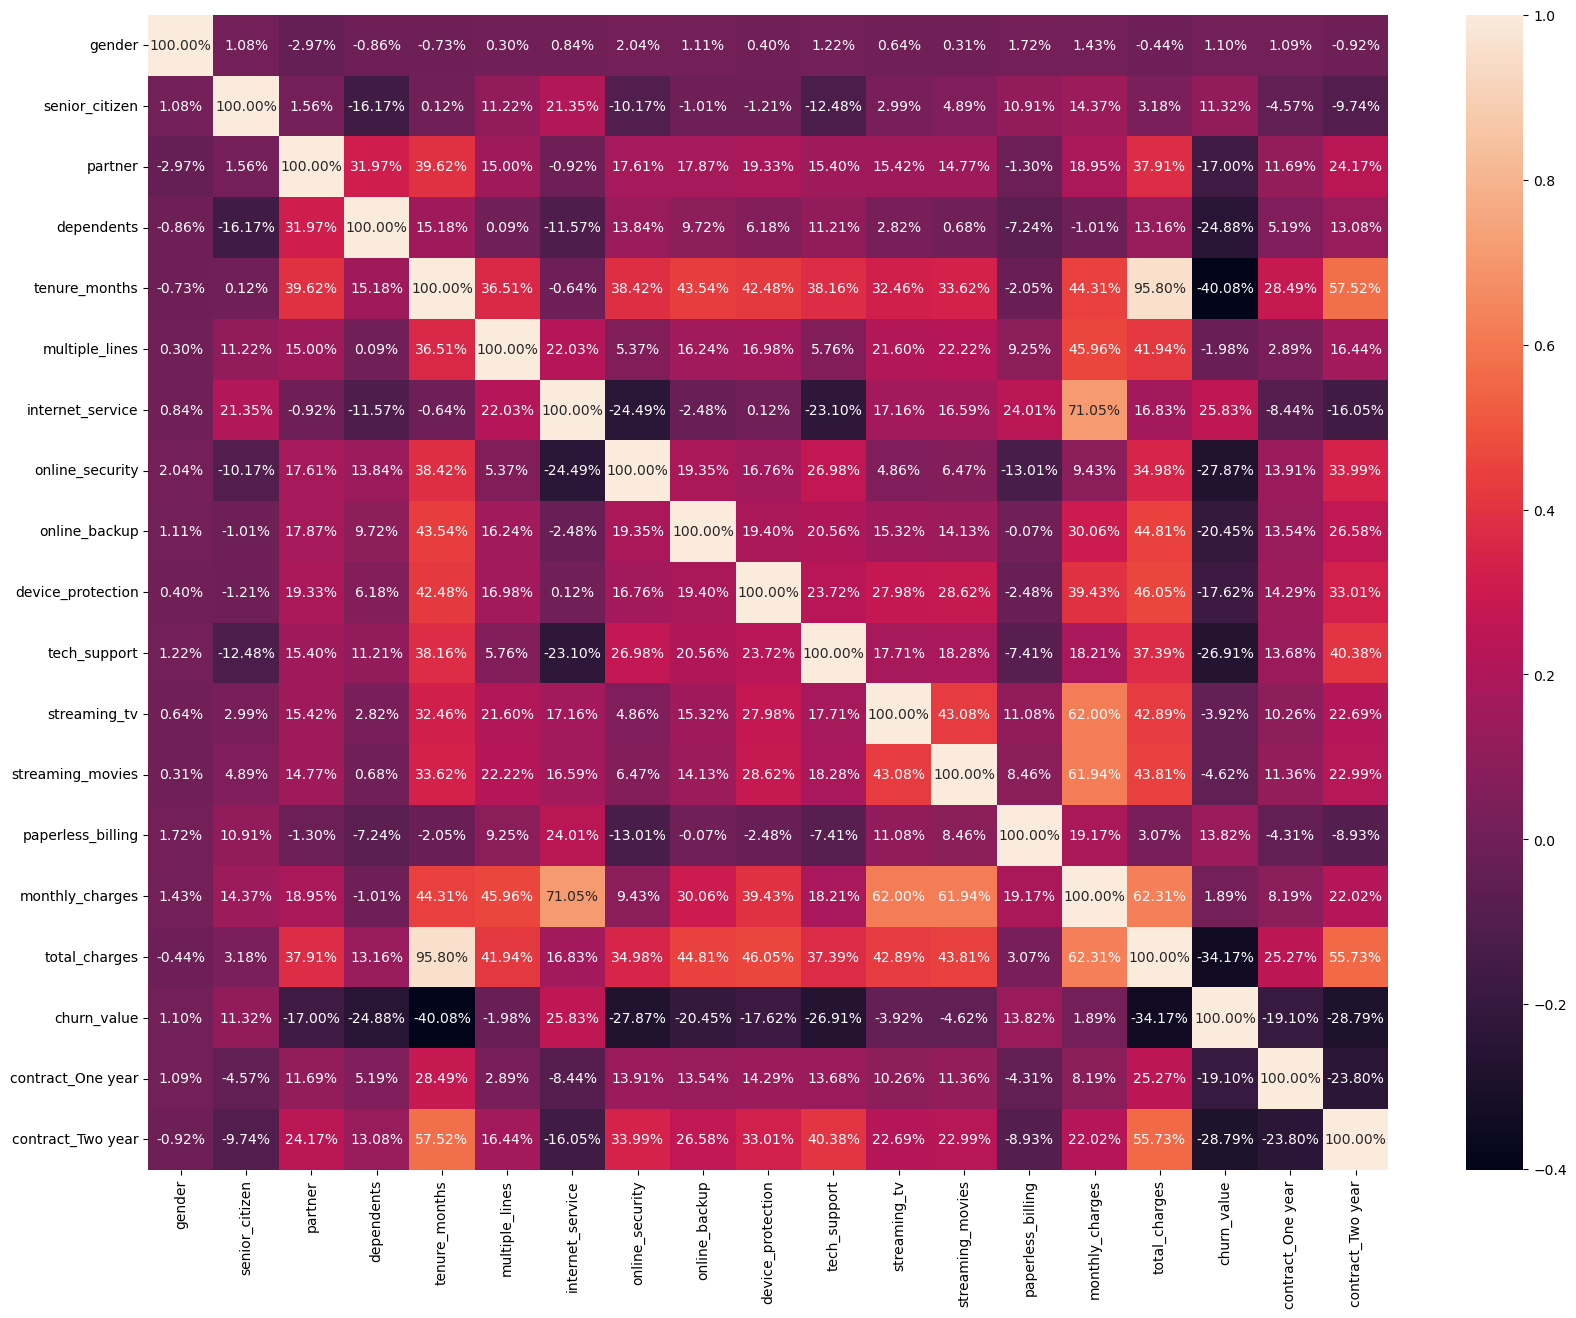

In [169]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt='.2%')